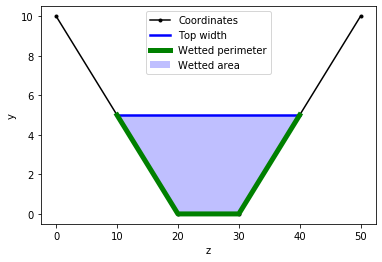

In [1]:
%matplotlib inline

from pantherapy.panthera import CrossSection


y_xs = [10, 0, 0, 10]
z_xs = [0, 20, 30, 50]
roughness = 0.013

depth = 5

xs = CrossSection(y_xs, z_xs, roughness)
_ = xs.plot(depth)

In [2]:
import numpy as np

from pantherapy.steady.flow import SteadyFlow
from pantherapy.steady.initialvalue import InitialValuePlan
from pantherapy.reach import Reach
from pantherapy.relation import FixedStageRelation


slope = 0.001
stream_distance = np.linspace(0, 4e3, num=5)
thalweg = stream_distance[::-1]*slope
reach = Reach()

for x, y in zip(stream_distance, thalweg):
    reach.put(xs, x, y)

flow = 30
flow_data = SteadyFlow()
flow_data.set_flow(0, 30)

downstream_depth = 5
boundary_condition = FixedStageRelation(downstream_depth)
boundary_location = 'downstream'

plan = InitialValuePlan(reach, flow_data, boundary_location, boundary_condition)
solution = plan.solve()

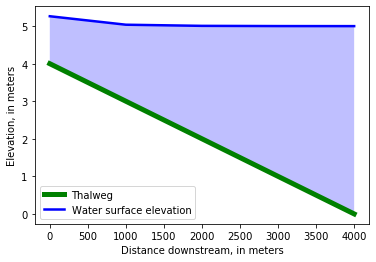

In [3]:
_ = solution.plot()

In [4]:
#  expected: 1.263, 2.038, 3.007, 4.002, 5

solution.wse() - solution.thalweg()

array([1.26331132, 2.03771267, 3.00733041, 4.00157385, 5.        ])